In [1]:
import numpy as np
import pyvista
import matplotlib.pyplot as plt

In [2]:
v = "07"
dt = .008
msh = pyvista.read("../Double_E10/"+v+"/vtk_data/vtk_output_mok_fsi_csm/Structure_0_1.vtk")

displacement_X = np.empty((msh.points.shape[0], 751))
displacement_Y = np.empty((msh.points.shape[0], 751))
time = np.arange(0, 751)*dt
for i in range(751):
    msh = pyvista.read("../Double_E10/"+v+"/vtk_data/vtk_output_mok_fsi_csm/Structure_0_"+str(i+1)+".vtk")

    displacement_X[:, i] = msh.point_data["DISPLACEMENT"][:, 0]
    displacement_Y[:, i] = msh.point_data["DISPLACEMENT"][:, 1]

displacement_X_ROM = np.empty((msh.points.shape[0], 751))
displacement_Y_ROM = np.empty((msh.points.shape[0], 751))
for i in range(751):
    msh = pyvista.read("../Double_ROM_E10/"+v+"_LASSO/vtk_data/vtk_output_mok_fsi_csm/Structure_0_"+str(i+1)+".vtk")
    displacement_X_ROM[:, i] = msh.point_data["DISPLACEMENT"][:, 0]
    displacement_Y_ROM[:, i] = msh.point_data["DISPLACEMENT"][:, 1]
    

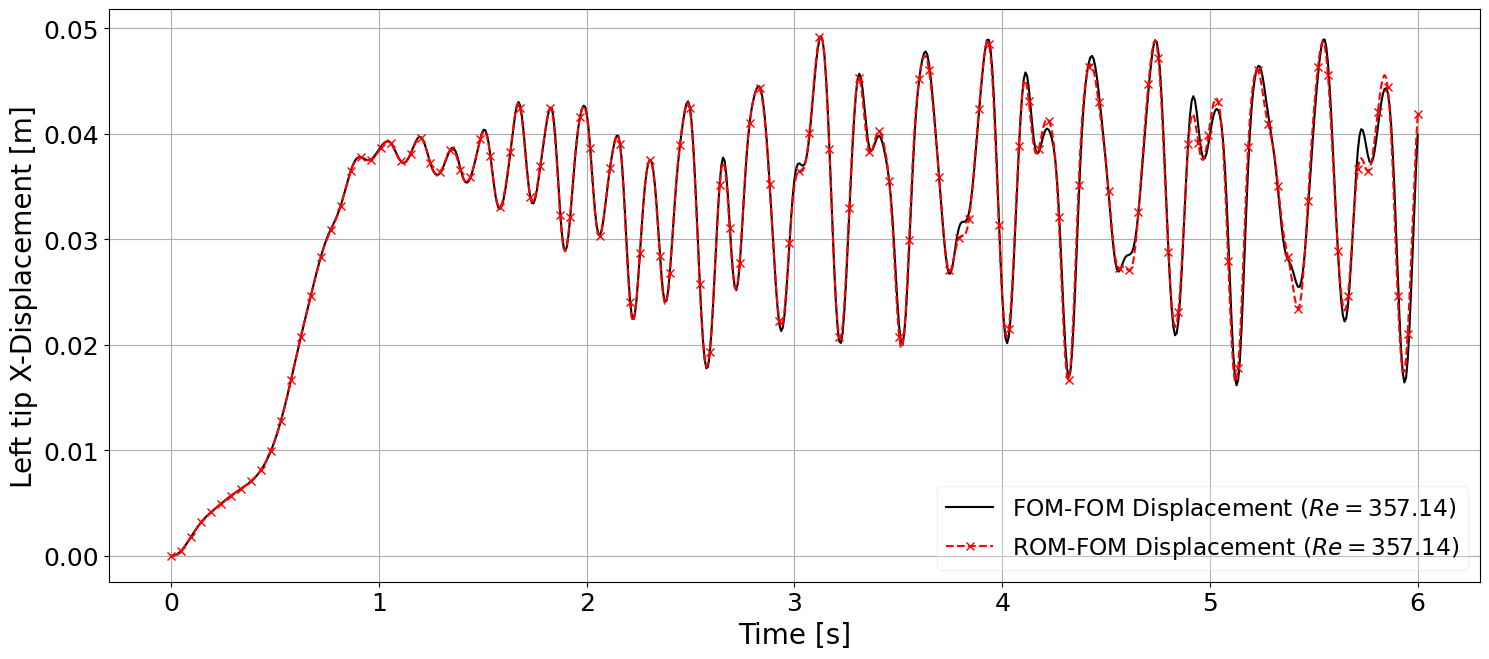

In [3]:
Re = .1*2.5*1000/(float(v)/10)
figure, ax = plt.subplots(figsize = (15, 6.7));
time_arr = np.arange(0, 6., 0.008);
start_pred = 425
if v == "07":
    start_pred = 0
    
#plt.plot(time_arr[:375], disps_x_tr[4, :375], '--', color = 'orange', label = r'FOM-FOM Displacement - $Re = 250$ (Training)');
#plt.plot(time_arr[374:569], disps_x_tr[4, 374:569], '--', color = 'deepskyblue', label = r'FOM-FOM Displacement - $Re = 250$');
plt.plot(time, displacement_X[1488, :], 'black', label = r'FOM-FOM Displacement ($Re = $'+"%.2f" %Re+')',);
plt.plot(time[start_pred:], displacement_X_ROM[1488, start_pred:], 'x--',  markevery = 6, color = 'red', label = r'ROM-FOM Displacement ($Re = $'+"%.2f" %Re+')',);

ax.set_xlabel("Time [s]", fontsize = 20);
ax.set_ylabel("Left tip X-Displacement [m]", fontsize = 20);

ax.tick_params(axis='both', which='major', labelsize = 18)
ax.tick_params(axis='both', which='minor', labelsize = 18)

legend = plt.legend(loc = 'best', framealpha = .25,  prop={'size': 16.8})
#frame = legend.get_frame()
#frame.set_color('white')
plt.grid();
plt.tight_layout();

#plt.savefig("rom_fom_tip.pdf", transparent = True, bbox_inches = 'tight');

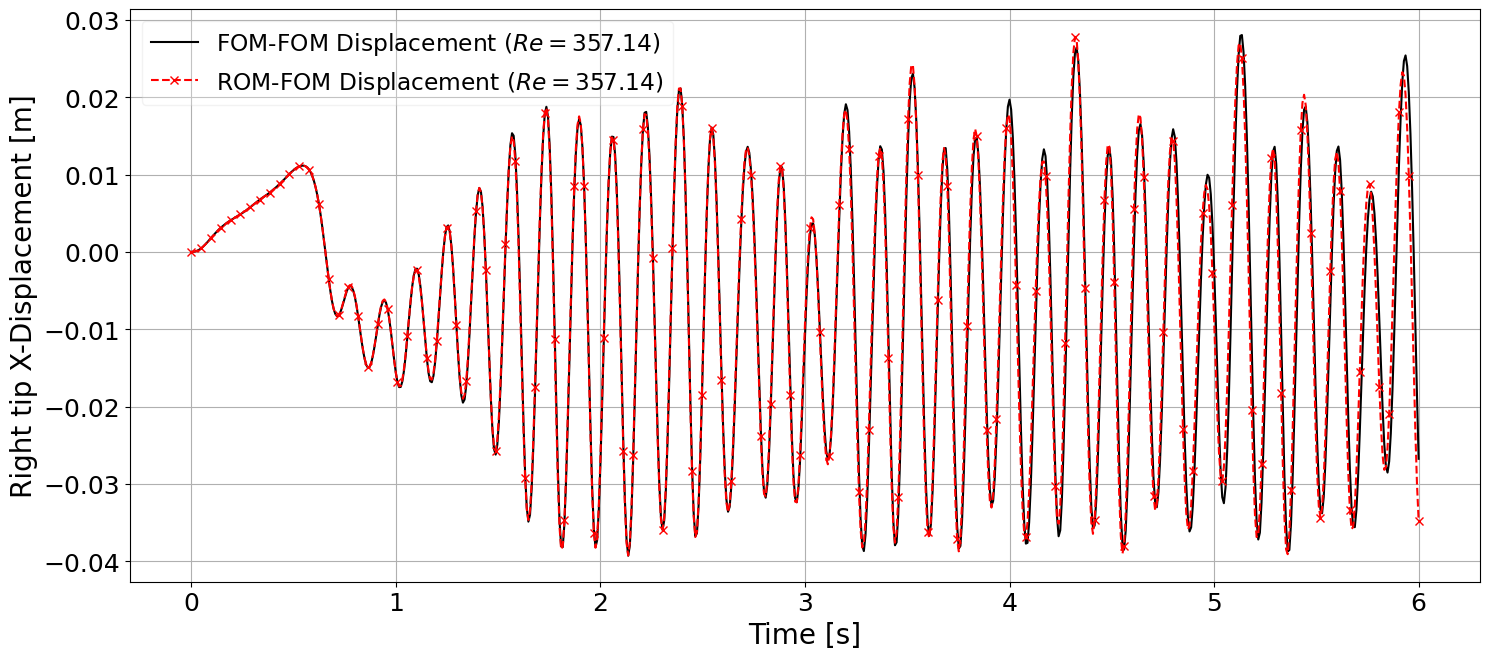

In [4]:
Re = .1*2.5*1000/(float(v)/10)
figure, ax = plt.subplots(figsize = (15, 6.7));
time_arr = np.arange(0, 6., 0.008);
start_pred = 425
if v == "07":
    start_pred = 0
    
#plt.plot(time_arr[:375], disps_x_tr[4, :375], '--', color = 'orange', label = r'FOM-FOM Displacement - $Re = 250$ (Training)');
#plt.plot(time_arr[374:569], disps_x_tr[4, 374:569], '--', color = 'deepskyblue', label = r'FOM-FOM Displacement - $Re = 250$');
plt.plot(time, displacement_X[0, :], 'black', label = r'FOM-FOM Displacement ($Re = $'+"%.2f" %Re+')',);
plt.plot(time[start_pred:], displacement_X_ROM[0, start_pred:], 'x--',  markevery = 6, color = 'red', label = r'ROM-FOM Displacement ($Re = $'+"%.2f" %Re+')',);

ax.set_xlabel("Time [s]", fontsize = 20);
ax.set_ylabel("Right tip X-Displacement [m]", fontsize = 20);

ax.tick_params(axis='both', which='major', labelsize = 18)
ax.tick_params(axis='both', which='minor', labelsize = 18)

legend = plt.legend(loc = 'best', framealpha = .25,  prop={'size': 16.8})
#frame = legend.get_frame()
#frame.set_color('white')
plt.grid();
plt.tight_layout();

#plt.savefig("rom_fom_tip.pdf", transparent = True, bbox_inches = 'tight');

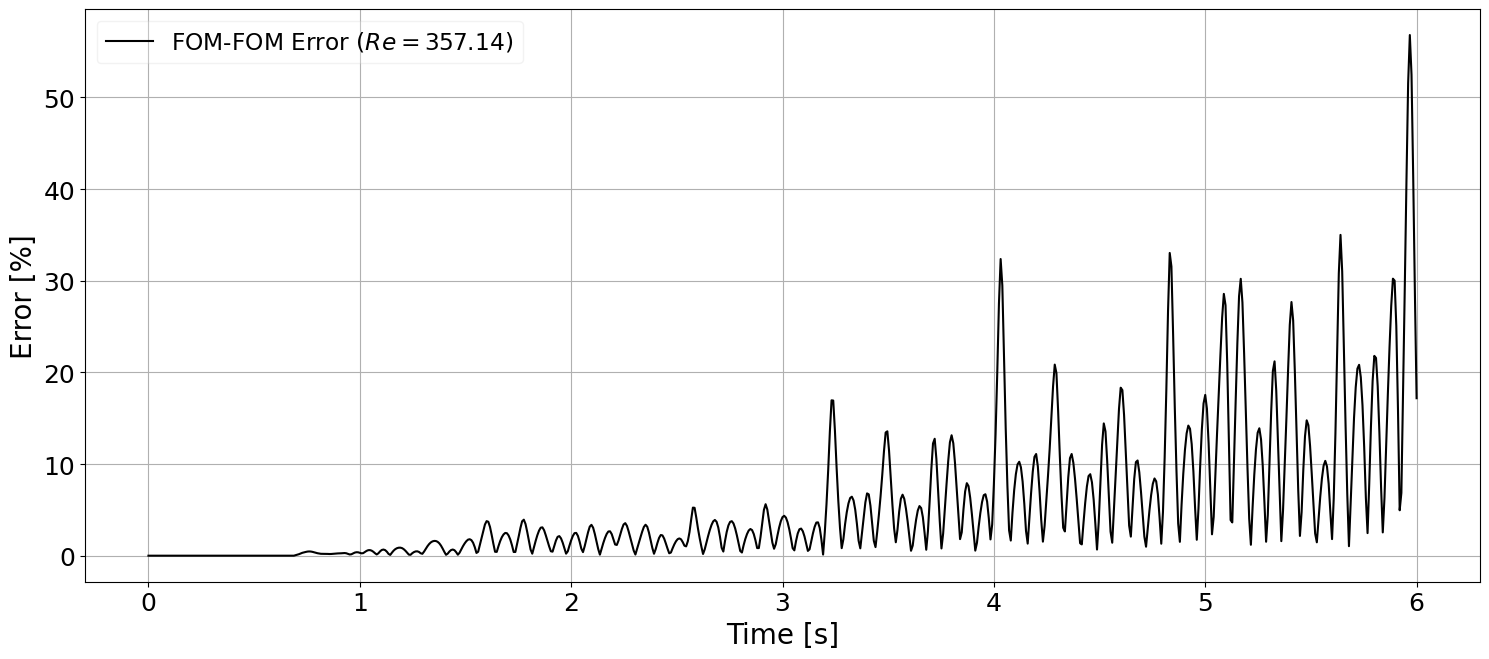

In [5]:
Re = .1*2.5*1000/(float(v)/10)
figure, ax = plt.subplots(figsize = (15, 6.7));
time_arr = np.arange(0, 6., 0.008);
start_pred = 425
if v == "07":
    start_pred = 0

disp = np.vstack((displacement_X, ))
disp_ROM = np.vstack((displacement_X_ROM, ))

error = 100.*np.linalg.norm(disp - disp_ROM, axis = 0)/np.linalg.norm(disp, axis = 0)
plt.plot(time[start_pred:], error[start_pred:], 'black', label = r'FOM-FOM Error ($Re = $'+"%.2f" %Re+')',);

ax.set_xlabel("Time [s]", fontsize = 20);
ax.set_ylabel("Error [%]", fontsize = 20);

ax.tick_params(axis='both', which='major', labelsize = 18)
ax.tick_params(axis='both', which='minor', labelsize = 18)

legend = plt.legend(loc = 'best', framealpha = .25,  prop={'size': 16.8})
#frame = legend.get_frame()
#frame.set_color('white')
plt.grid();
plt.tight_layout();

#plt.savefig("rom_fom_tip.pdf", transparent = True, bbox_inches = 'tight');